In [1]:
from skimage import io
from skimage.measure import label, regionprops
from skimage.transform import resize
from skimage.morphology import erosion
import matplotlib.pyplot as plt
import os
import numpy as np
import h5py

#from midap.networks.unets import UNetv1
#from midap.segmentation.unet_segmentator import UNetSegmentation

In [2]:
img = io.imread("../../midap-datasets/segmentation/Guga/pos1/pos1/TXRED/cut_im/Timelapse_pos1_TXRED_frame000_cut.png")
seg = io.imread("../../midap-datasets/segmentation/Guga/pos1/pos1/TXRED/seg_im/Timelapse_pos1_TXRED_frame000_seg.tif")

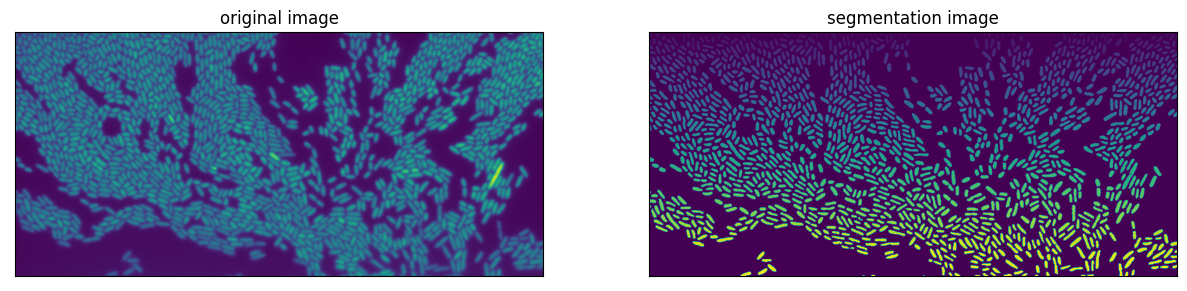

In [3]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(seg)
plt.xticks([])
plt.yticks([])
plt.title('segmentation image');

## Image resizing

### Old approach (resize, make binary, label)

In [4]:
target_list = [2**i for i in range(4,13)]
num_cells = []
segs_label = []
for target in target_list:
    target_size = (target,target)
    seg_res = (resize(seg, target_size, order=0) > 0).astype(int)
    seg_res_label = label(seg_res)
    segs_label.append(seg_res_label)
    num_cells.append(np.max(seg_res_label))

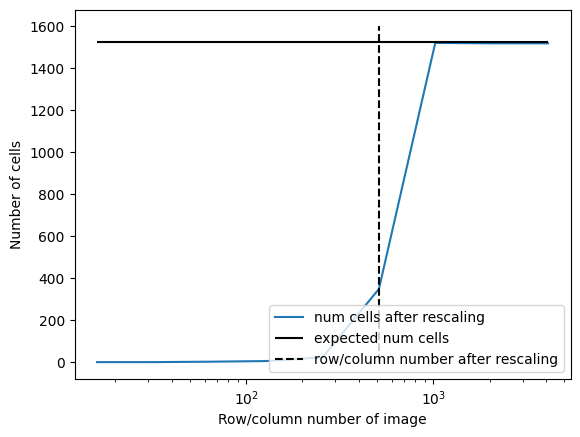

In [5]:
orig_num_cells = np.max(seg)
plt.plot(target_list, num_cells, label='num cells after rescaling')
plt.hlines(orig_num_cells, target_list[0], target_list[-1], color='k', label='expected num cells')
plt.vlines(512, 0, 1600, 'k', linestyle='dashed', label='row/column number after rescaling')
plt.xticks(target_list)
plt.xscale('log')
plt.xlabel('Row/column number of image')
plt.ylabel('Number of cells')
plt.legend(loc=4)

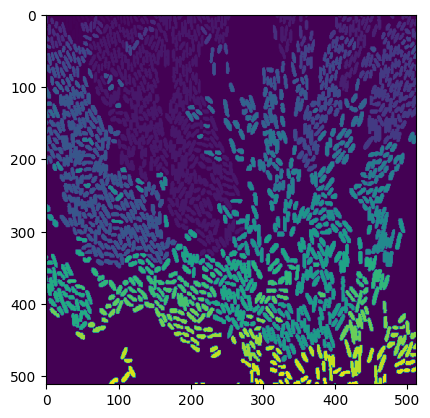

In [6]:
plt.imshow(segs_label[5])

### New approach (make binary, resize, label)

In [7]:
target_list = [2**i for i in range(4,13)]
num_cells = []
segs_label = []
for target in target_list:
    target_size = (target,target)
    seg_res = resize(seg > 0, target_size)
    seg_res_label = label(seg_res)
    segs_label.append(seg_res_label)
    num_cells.append(np.max(seg_res_label))

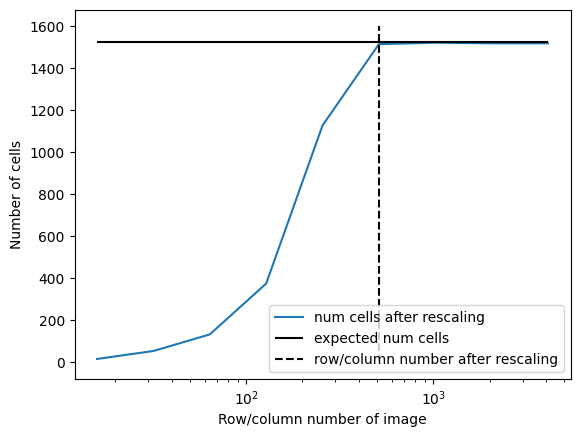

In [8]:
orig_num_cells = np.max(seg)
plt.plot(target_list, num_cells, label='num cells after rescaling')
plt.hlines(orig_num_cells, target_list[0], target_list[-1], color='k', label='expected num cells')
plt.vlines(512, 0, 1600, 'k', linestyle='dashed', label='row/column number after rescaling')
plt.xticks(target_list)
plt.xscale('log')
plt.xlabel('Row/column number of image')
plt.ylabel('Number of cells')
plt.legend(loc=4)

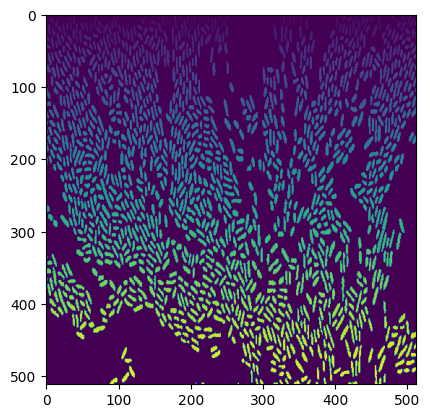

In [9]:
plt.imshow(segs_label[5])